In [74]:
from scipy.io import arff
import pandas as pd
import numpy as np

In [75]:
data, meta = arff.loadarff('./EEG Eye State.arff')

In [76]:
data

array([(4329.23, 4009.23, 4289.23, 4148.21, 4350.26, 4586.15, 4096.92, 4641.03, 4222.05, 4238.46, 4211.28, 4280.51, 4635.9 , 4393.85, b'0'),
       (4324.62, 4004.62, 4293.85, 4148.72, 4342.05, 4586.67, 4097.44, 4638.97, 4210.77, 4226.67, 4207.69, 4279.49, 4632.82, 4384.1 , b'0'),
       (4327.69, 4006.67, 4295.38, 4156.41, 4336.92, 4583.59, 4096.92, 4630.26, 4207.69, 4222.05, 4206.67, 4282.05, 4628.72, 4389.23, b'0'),
       ...,
       (4277.44, 3990.77, 4246.67, 4113.85, 4333.33, 4615.38, 4072.82, 4623.59, 4193.33, 4212.82, 4160.51, 4257.95, 4591.79, 4339.49, b'1'),
       (4284.62, 3991.79, 4251.28, 4122.05, 4334.36, 4616.41, 4080.51, 4628.72, 4200.  , 4220.  , 4165.64, 4267.18, 4596.41, 4350.77, b'1'),
       (4287.69, 3997.44, 4260.  , 4121.03, 4333.33, 4616.41, 4088.72, 4638.46, 4212.31, 4226.67, 4167.69, 4274.36, 4597.95, 4350.77, b'1')],
      dtype=[('AF3', '<f8'), ('F7', '<f8'), ('F3', '<f8'), ('FC5', '<f8'), ('T7', '<f8'), ('P7', '<f8'), ('O1', '<f8'), ('O2', '<f8'), ('P8',

In [77]:
meta

Dataset: EEG_DATA
	AF3's type is numeric
	F7's type is numeric
	F3's type is numeric
	FC5's type is numeric
	T7's type is numeric
	P7's type is numeric
	O1's type is numeric
	O2's type is numeric
	P8's type is numeric
	T8's type is numeric
	FC6's type is numeric
	F4's type is numeric
	F8's type is numeric
	AF4's type is numeric
	eyeDetection's type is nominal, range is ('0', '1')

In [78]:
df = pd.DataFrame(data)

In [79]:
df.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,b'0'
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,b'0'
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,b'0'
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,b'0'
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,b'0'


In [80]:
df['eyeDetection'] = df['eyeDetection'].apply(lambda x: int(x.decode()))

In [81]:
df.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


In [82]:
len(df)

14980

In [83]:
import numpy as np
import pandas as pd
from scipy.signal import firwin, filtfilt
import math as math


In [84]:
sampling_rate = math.floor(len(df)/117)
print(sampling_rate)

128


In [85]:
def design_fir_bandpass(low, high, fs, width=1.0, ripple_db=60.0):
    return firwin(
        numtaps=int(fs*2),  # 2 sec filter kernel
        cutoff=[low, high],
        window=('kaiser', ripple_db),
        pass_zero=False,
        fs=fs,
        width=width
    )


In [86]:
fs = sampling_rate
f_bands = {
    'delta': (0.5, 4),
    'theta': (4, 8),
    'alpha': (8, 13),
    'beta': (13, 30)
}
filters = {band: design_fir_bandpass(lo, hi, fs) for band, (lo, hi) in f_bands.items()}


In [87]:
def bandpower(signal, fs, taps, window_size=1.0):
    """
    Returns band power over time using sliding windows.
    signal: 1D array
    fs: sampling rate
    taps: filter coefficients
    window_size: in seconds
    """
    filtered = filtfilt(taps, 1.0, signal)
    win_len = int(window_size * fs)
    powers = []

    for start in range(0, len(signal) - win_len + 1, win_len):
        segment = filtered[start:start + win_len]
        power = np.mean(segment ** 2)  # Mean power over window
        powers.append(power)

    return powers


In [88]:
eeg_channels = df.columns[:-1]  # exclude 'eyeDetection'
eeg_data = df[eeg_channels].values

# Result shape: (num_windows, num_channels * num_bands)
window_size = 1  # seconds
features = []

for ch_idx in range(eeg_data.shape[1]):
    ch_data = eeg_data[:, ch_idx]
    band_powers = []
    for band, taps in filters.items():
        power_series = bandpower(ch_data, fs, taps, window_size)
        band_powers.append(power_series)
    
    # Each band_powers list is (num_bands, num_windows), so we transpose
    features.append(np.array(band_powers).T)

# Concatenate all channel-band features
X = np.hstack(features)  # Shape: (num_windows, num_channels * num_bands)
print(X.shape)
print(X)
print("X[0]",X[0])


(117, 56)
[[1.65328590e+02 1.04968522e+01 1.91687251e+01 ... 1.56281912e+01
  2.76993604e+01 3.10209968e+01]
 [3.37955458e+03 5.40968627e+01 1.66455857e+01 ... 3.03467866e+01
  9.92749032e+00 2.10011061e+01]
 [5.73517460e+02 2.38461014e+01 7.29840027e+00 ... 2.11764012e+01
  1.23098108e+01 2.29560257e+01]
 ...
 [4.80071168e+01 4.03896922e+00 7.63569566e+00 ... 2.38583421e+00
  1.18671314e+01 1.03765216e+01]
 [1.85187305e+01 9.52101655e+00 5.90907575e+00 ... 1.02384998e+01
  6.43875251e+00 2.02142543e+01]
 [1.88768564e+03 1.28359023e+02 8.24584951e+00 ... 1.09792489e+02
  6.21134003e+00 2.37255003e+01]]
X[0] [165.32858961  10.49685222  19.16872508  22.86363667  84.93164218
   5.01493427  13.43767392  17.40119291 116.98506208  20.80490798
  11.59439094  16.76514451  56.07761912   9.09404364   7.03902418
  10.58834444  31.32624222   2.66433481   5.02900755   9.16514147
  40.3949325    2.36603788   6.16205902   5.71858933  25.48616383
   3.14183744   7.93927408   9.30296035  70.01047881   

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import numpy as np

# Apply log transform to reduce skewness (add small offset to avoid log(0))
X_log = np.log1p(X)  # log(1 + X)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_log)
# 2. Create sequences
def create_sequences(data, window_size):
    X_seq, y_seq = [], []
    for i in range(len(data) - window_size):
        X_seq.append(data[i:i+window_size])
        y_seq.append(data[i+window_size])
    return np.array(X_seq), np.array(y_seq)

window_size = 5
X_seq, y_seq = create_sequences(X_scaled, window_size)
print(len(X_seq))


112


In [90]:
split = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:split], X_seq[split:]
y_train, y_test = y_seq[:split], y_seq[split:]


In [91]:


model = Sequential([
    LSTM(64, activation='relu', input_shape=(window_size, 56)),
    Dense(56)  # Predict next full wave pattern (56 values)
])
model.compile(optimizer='adam', loss='mse')
model.summary()


/home/purab/.local/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 64)             │        30,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 56)             │         3,640 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,616 (135.22 KB)

 Trainable params: 34,616 (135.22 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:

# ---------------------------
# 5. Train with EarlyStopping and Checkpoint
# ---------------------------
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_predictor.keras', monitor='val_loss', save_best_only=True)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=8,
    validation_split=0.2,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0320 - val_loss: 0.1068
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0254 - val_loss: 0.0914
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0135 - val_loss: 0.0836
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0154 - val_loss: 0.0793
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0183 - val_loss: 0.0775
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0139 - val_loss: 0.0765
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0123 - val_loss: 0.0760
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0111 - val_loss: 0.0758
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0097 - val_loss: 0.0747
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0201 - val_loss: 0.0742
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0150 - val_loss: 0.0744
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0092 - val_loss: 0.0735
Epo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step

RMSE per channel-band feature (total 56):
Feature AF3-delta: RMSE = 2.0551
Feature AF3-theta: RMSE = 1.5728
Feature AF3-alpha: RMSE = 1.3444
Feature AF3-beta: RMSE = 1.7813
Feature F7-delta: RMSE = 1.8845
Feature F7-theta: RMSE = 1.7308
Feature F7-alpha: RMSE = 1.6081
Feature F7-beta: RMSE = 1.7877
Feature F3-delta: RMSE = 1.1917
Feature F3-theta: RMSE = 1.1984
Feature F3-alpha: RMSE = 1.2173
Feature F3-beta: RMSE = 1.3990
Feature FC5-delta: RMSE = 1.1715
Feature FC5-theta: RMSE = 1.5156
Feature FC5-alpha: RMSE = 1.2355
Feature FC5-beta: RMSE = 1.3110
Feature T7-delta: RMSE = 1.0279
Feature T7-theta: RMSE = 1.4026
Feature T7-alpha: RMSE = 1.3496
Feature T7-beta: RMSE = 1.5607
Feature P7-delta: RMSE = 2.0015
Feature P7-theta: RMSE = 2.5697
Feature P7-alpha: RMSE = 2.7914
Feature P7-beta: RMSE = 3.3702
Feature O1-delta: RMSE = 0.9615
Feature O1-theta: RMSE = 1.3487
Feature O1-alpha: RMSE = 1.3652
Feature O1-beta: RMSE = 1.8188
Feature O2-delta: RMS

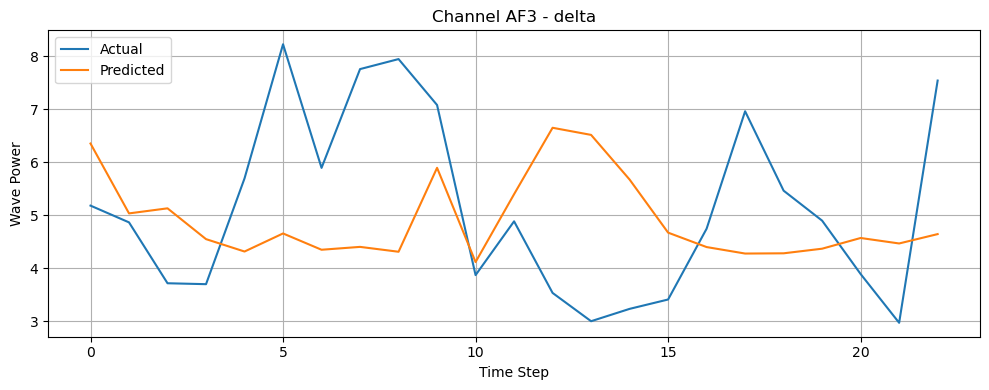

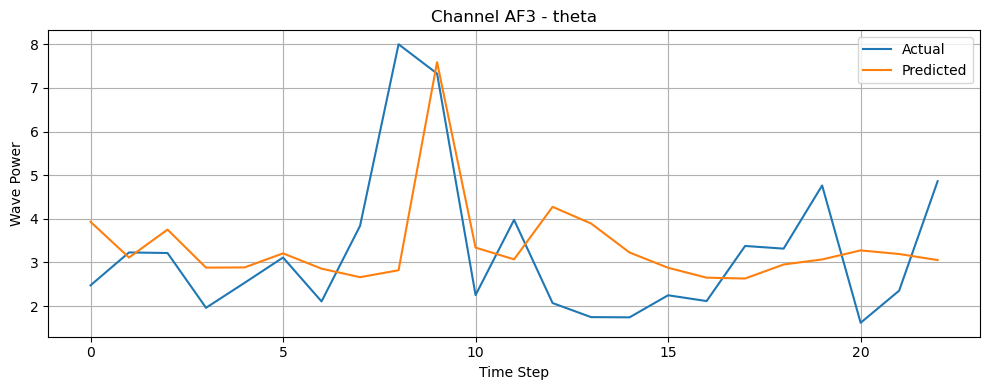

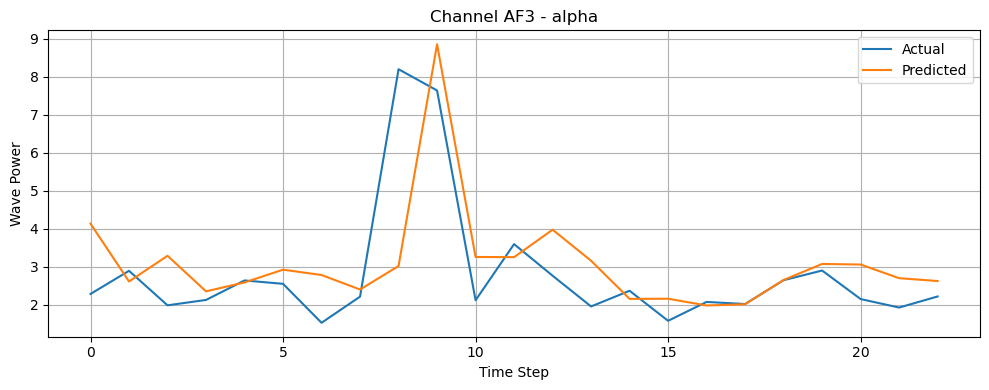

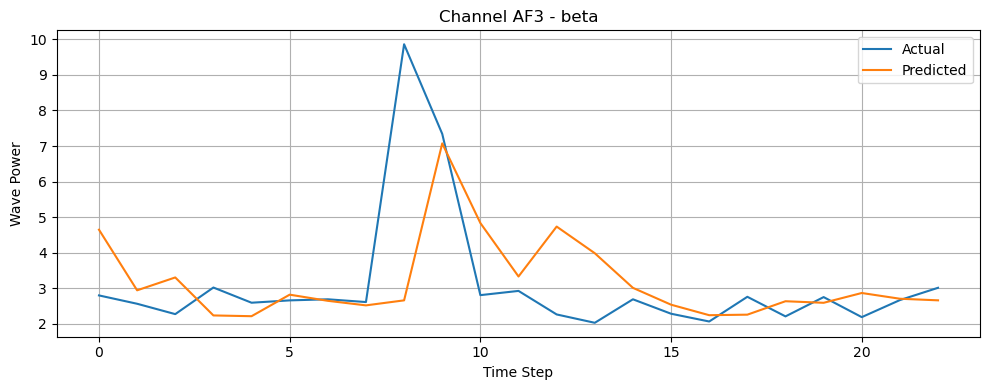

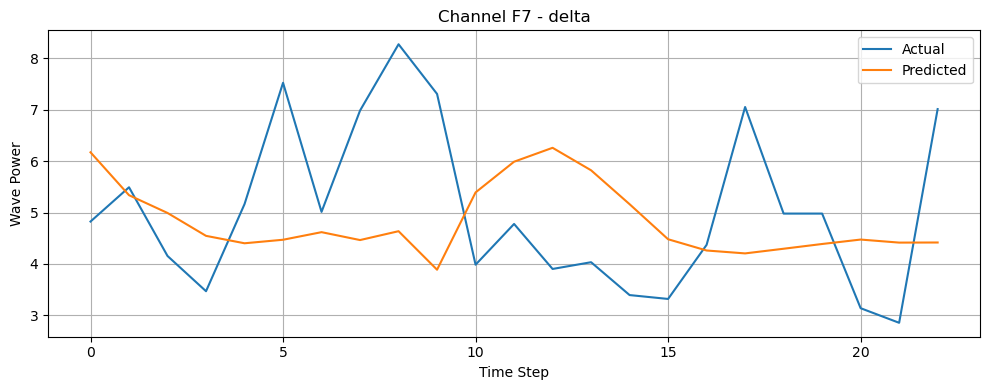

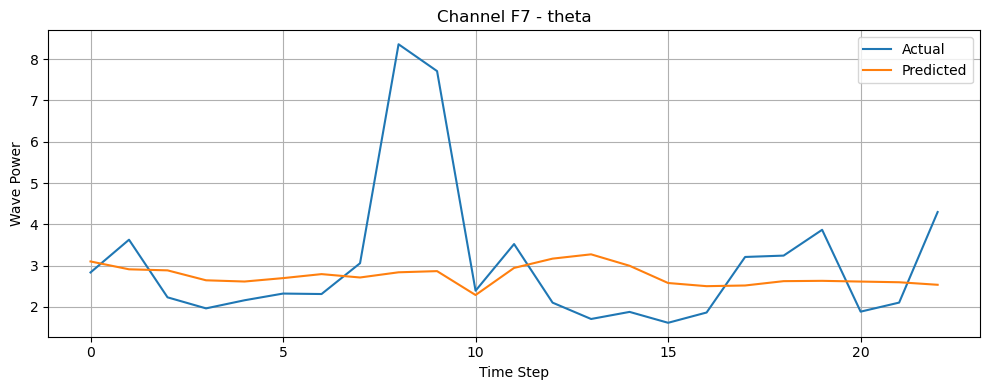

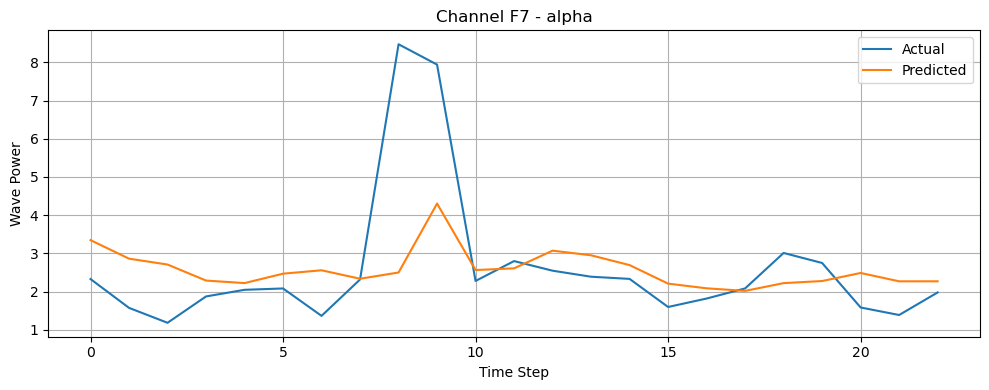

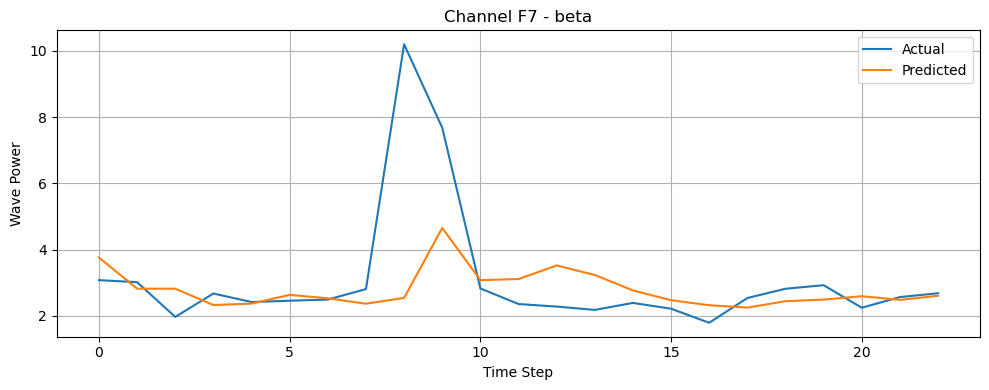

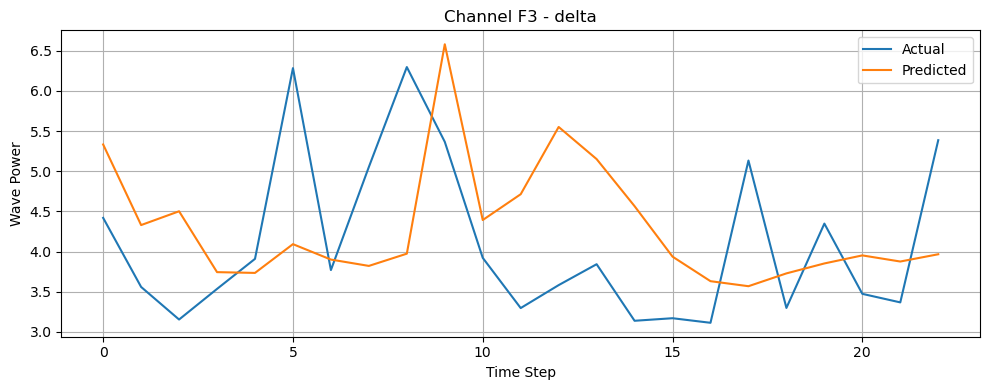

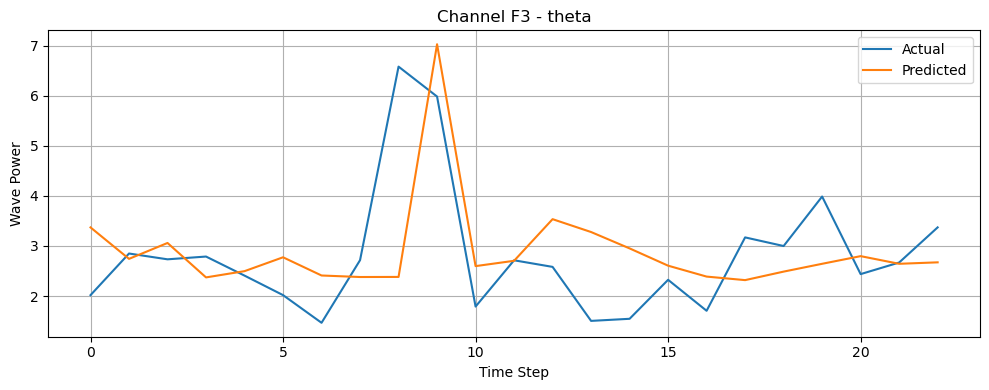

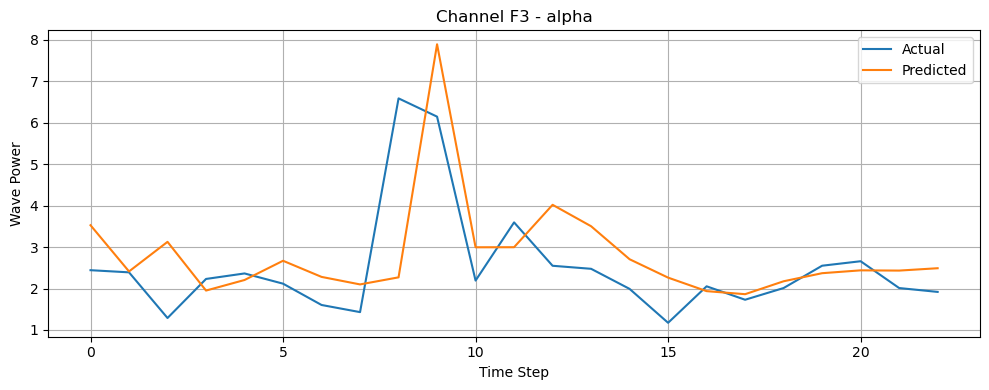

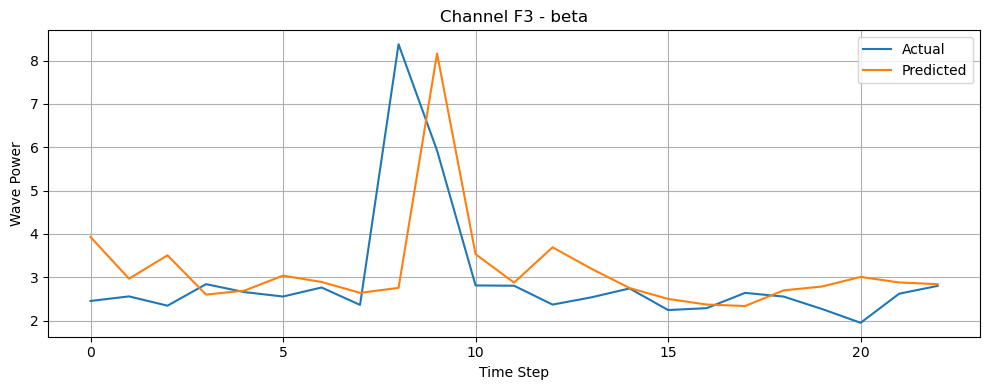

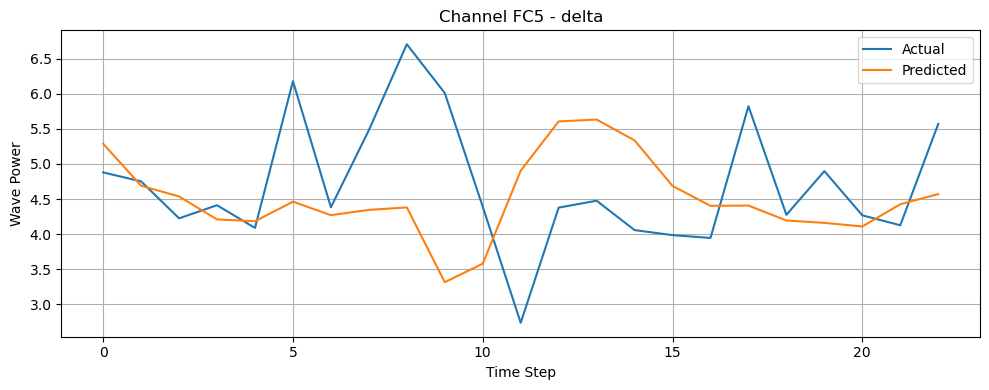

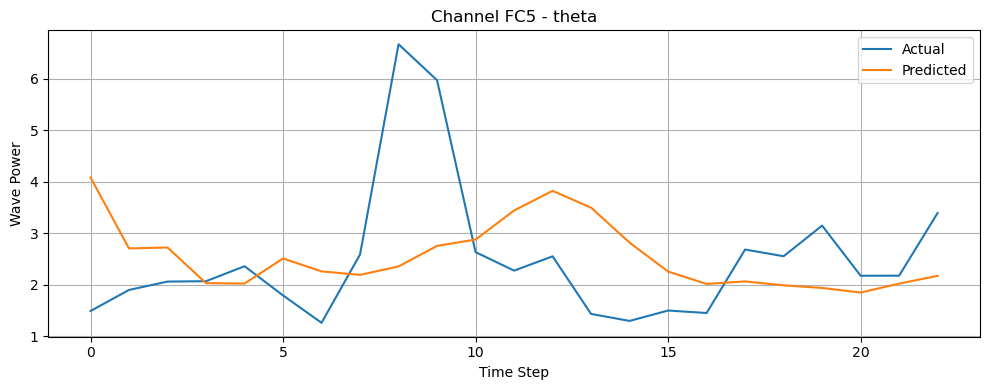

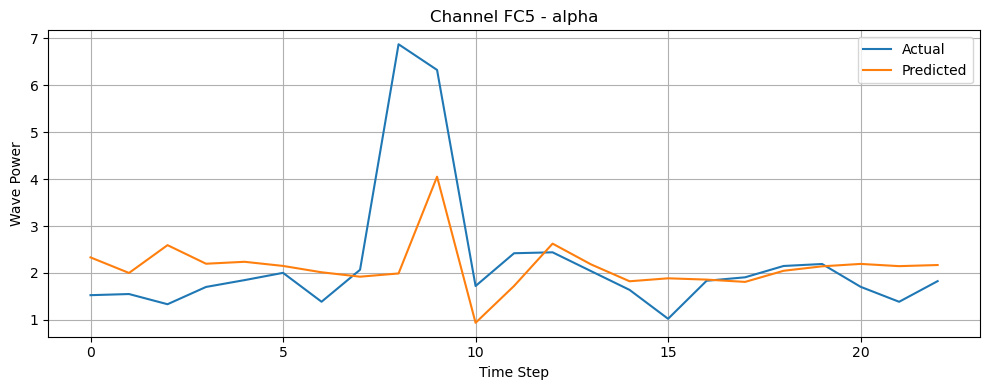

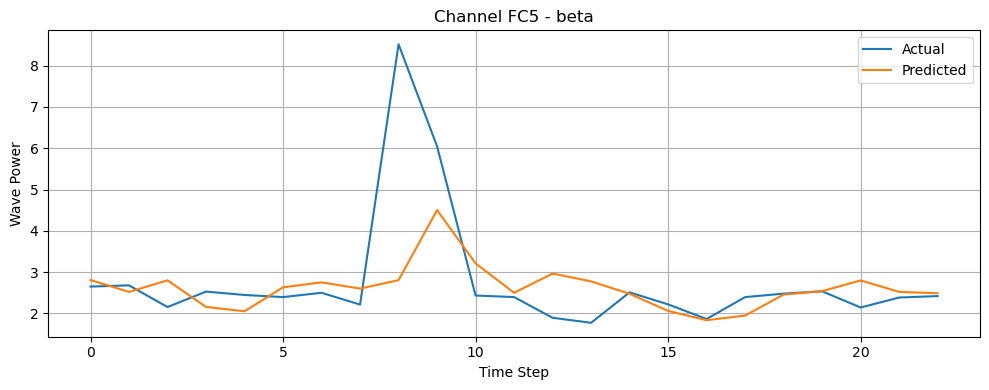

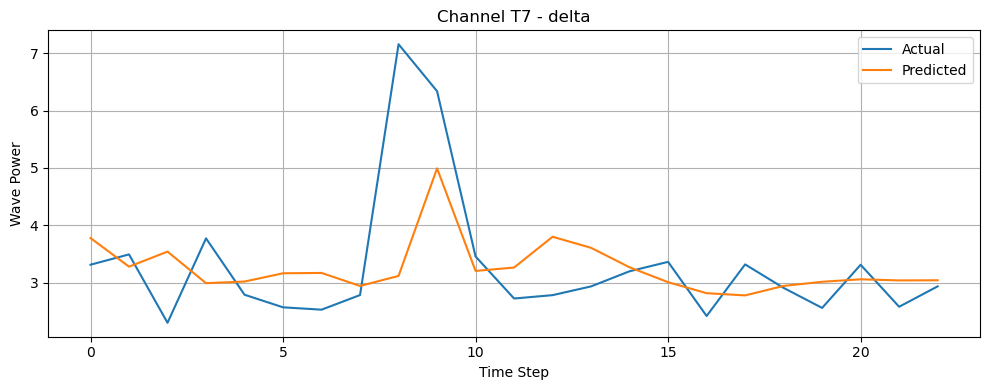

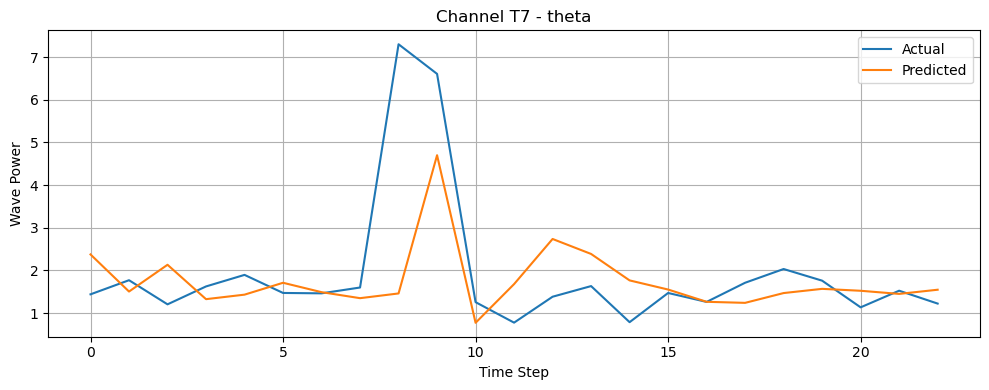

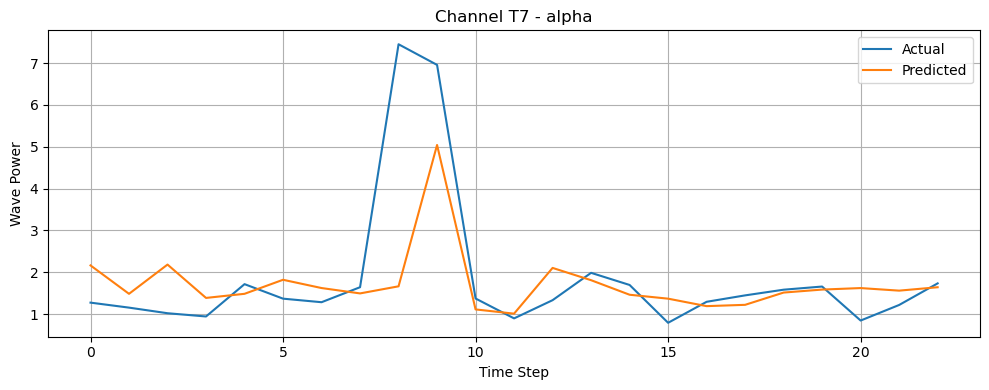

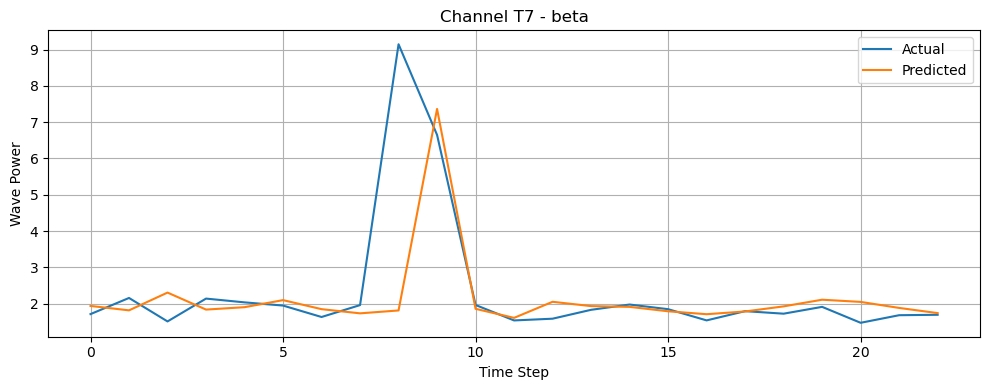

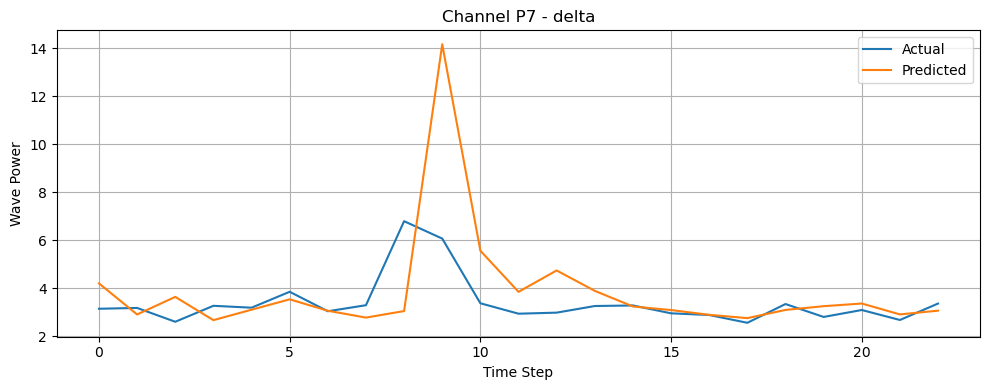

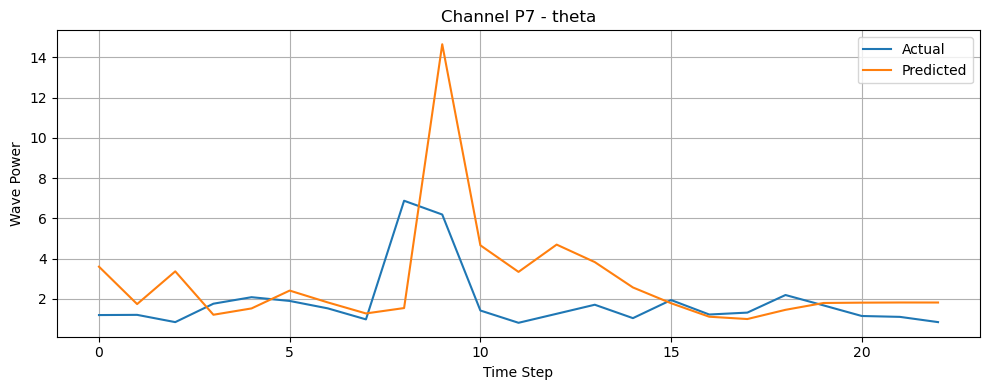

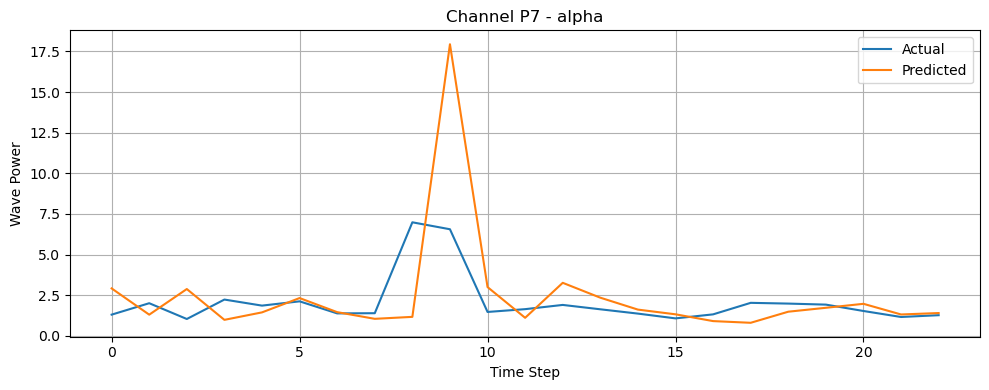

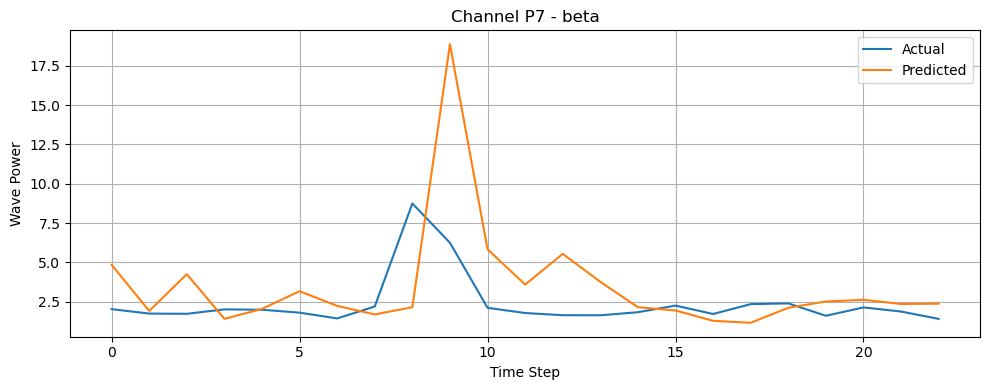

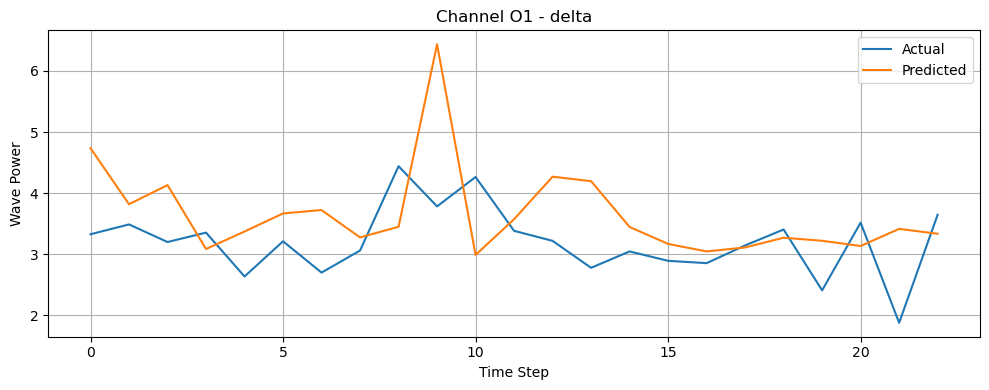

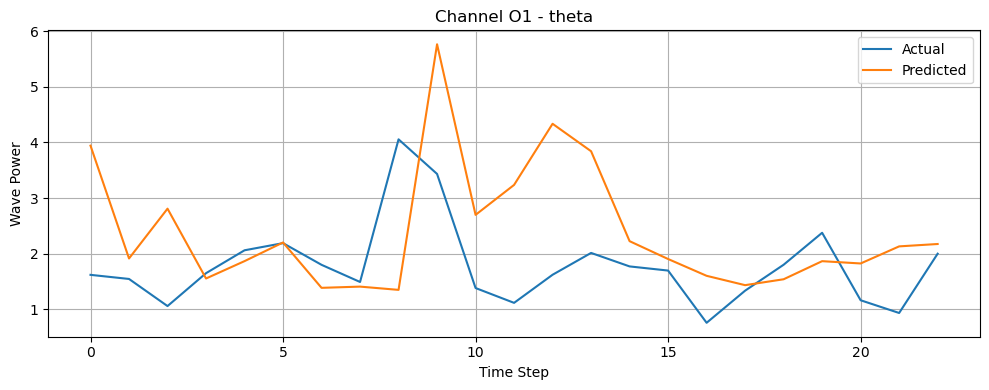

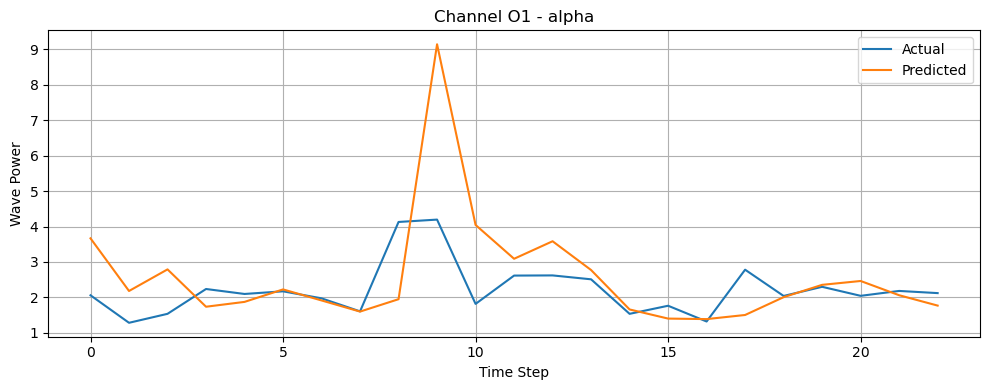

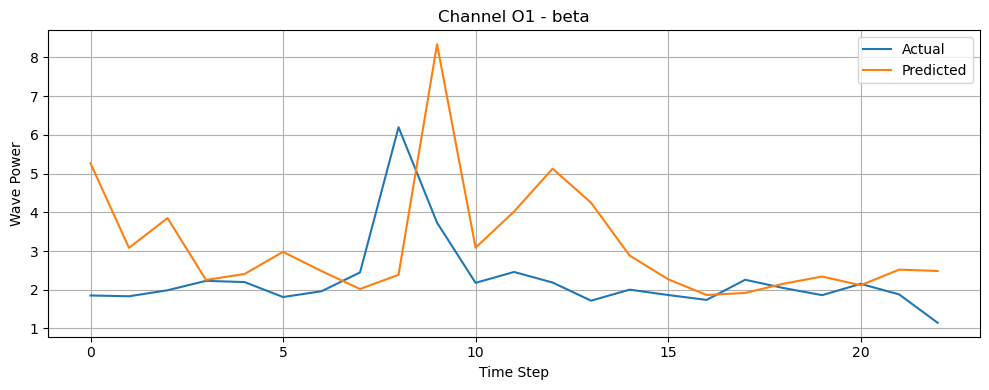

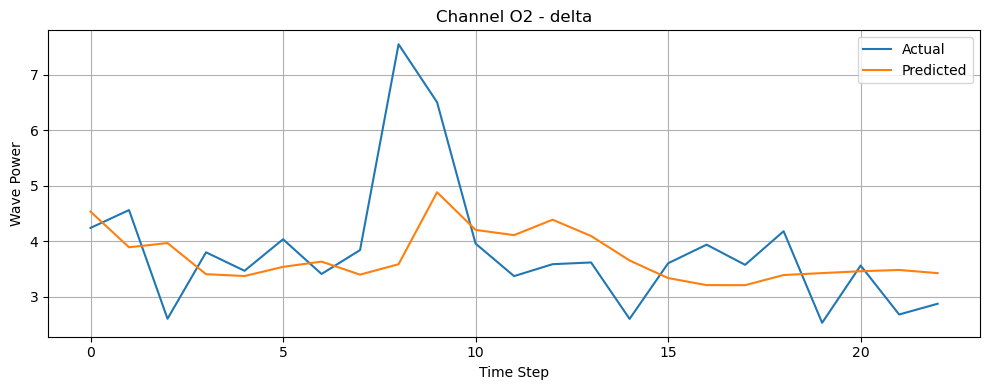

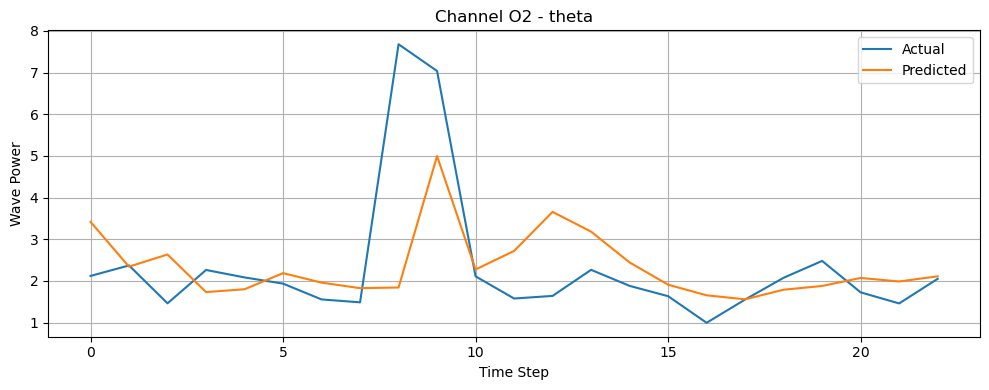

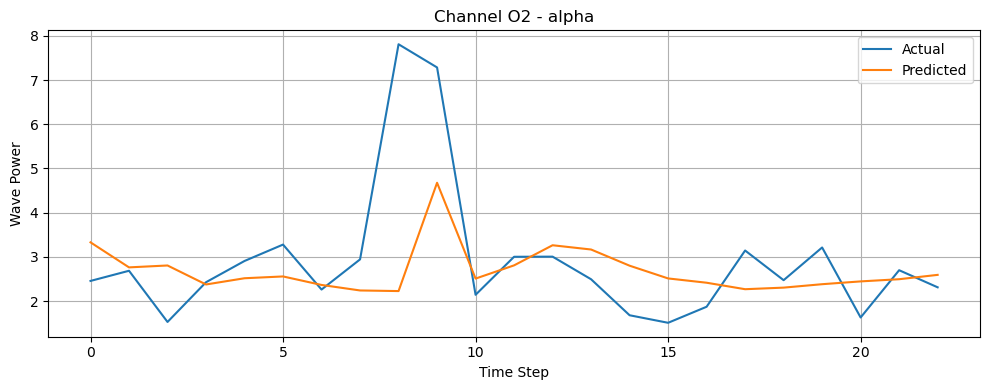

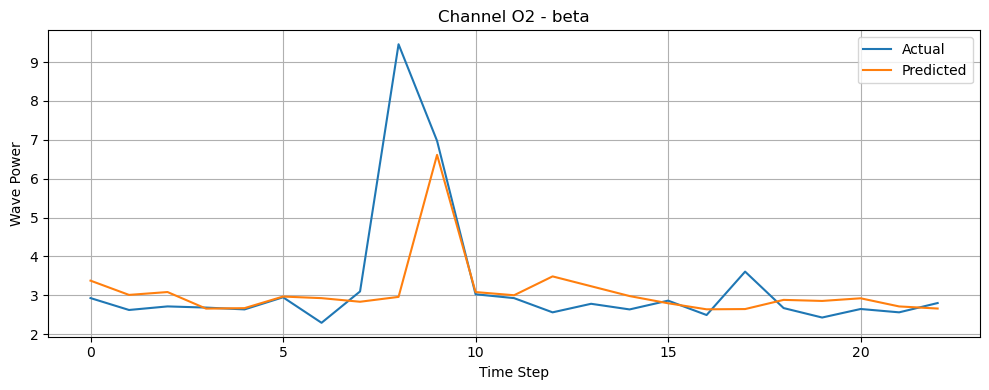

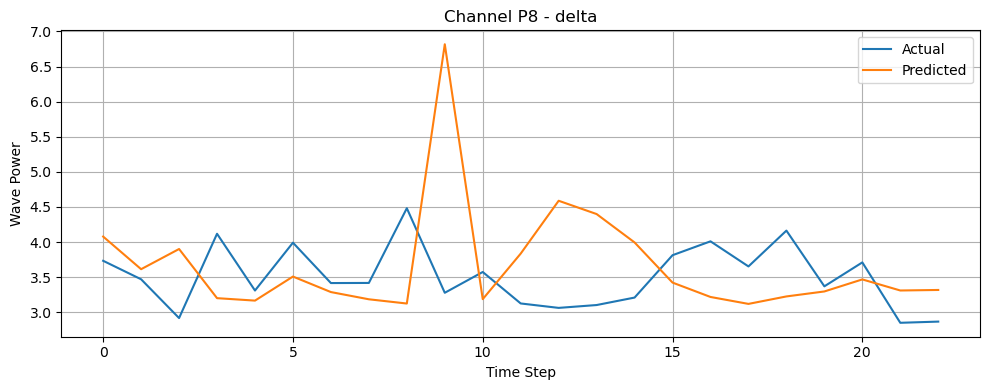

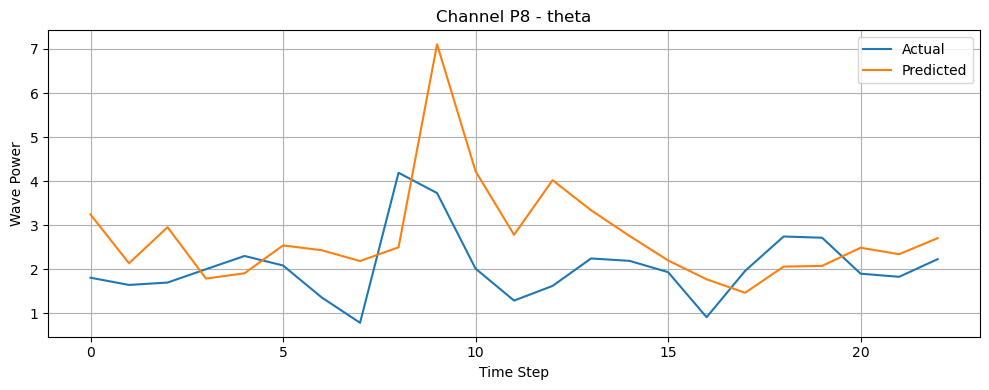

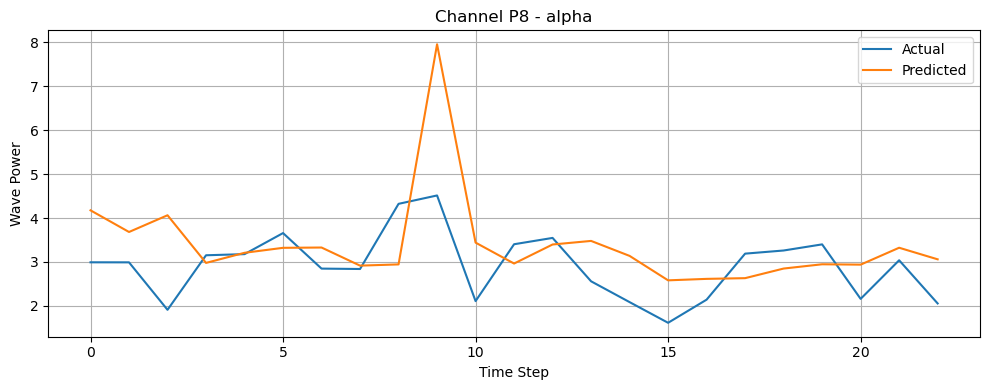

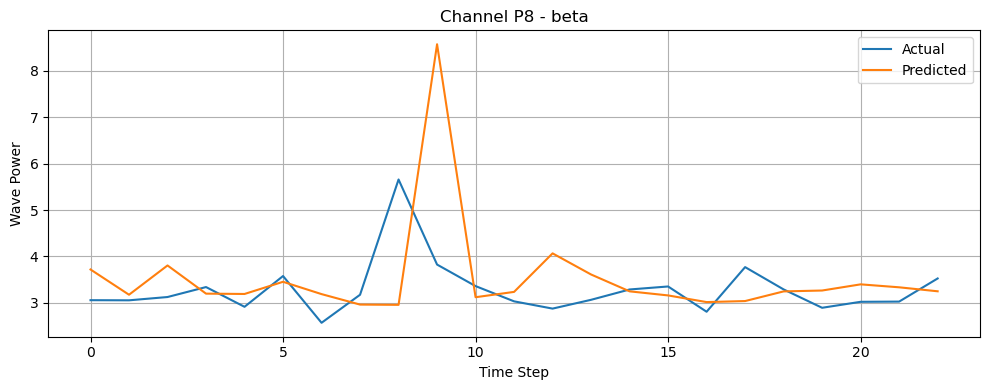

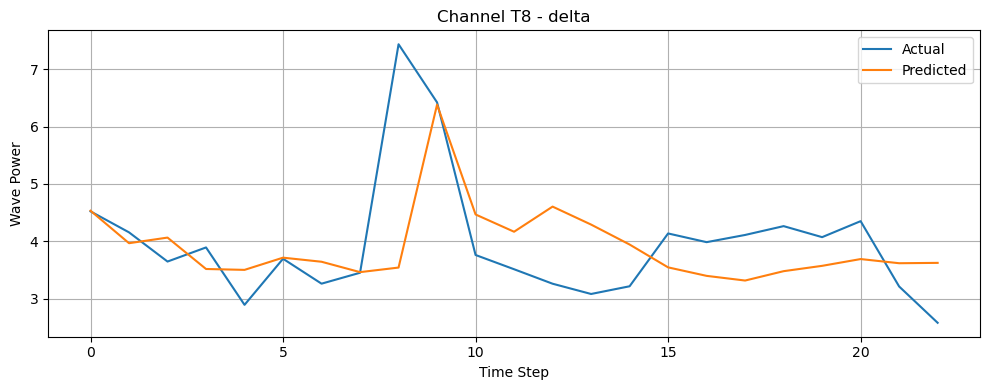

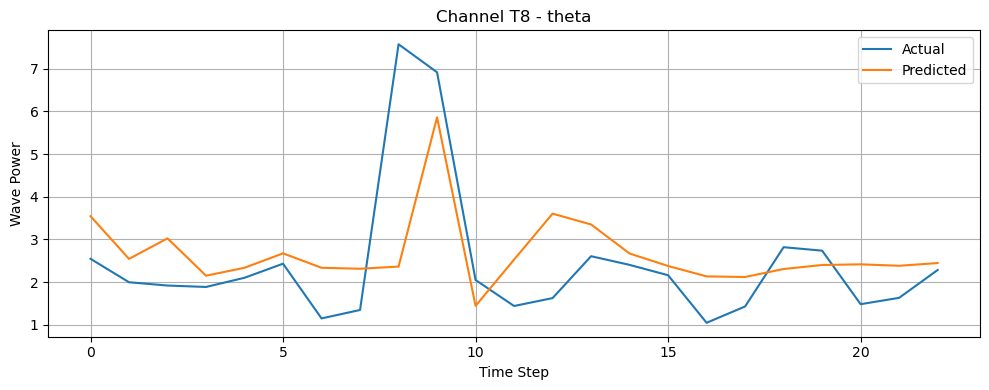

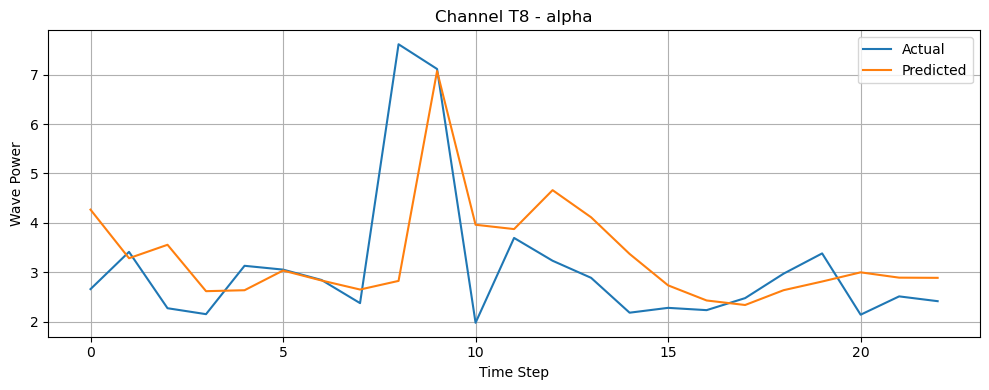

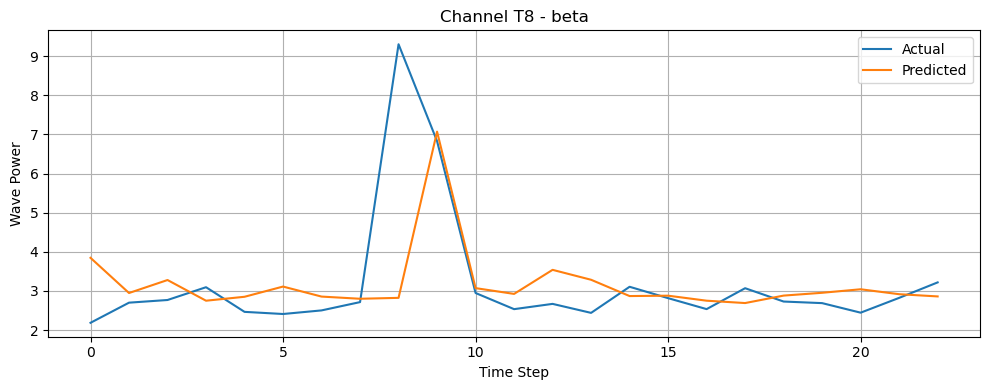

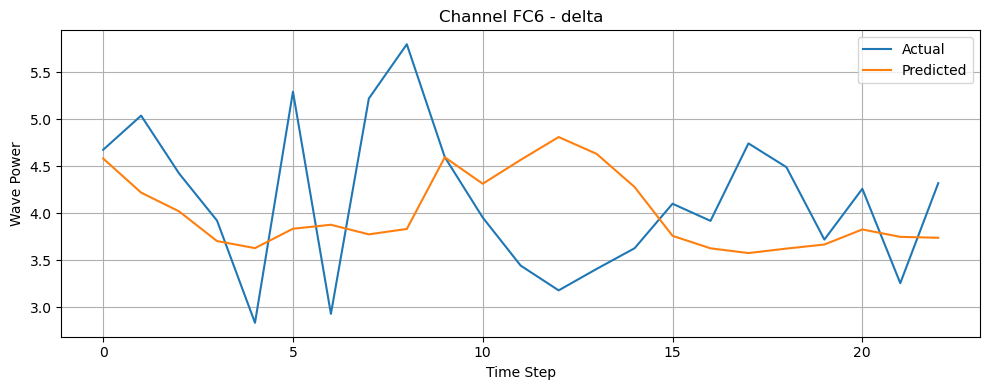

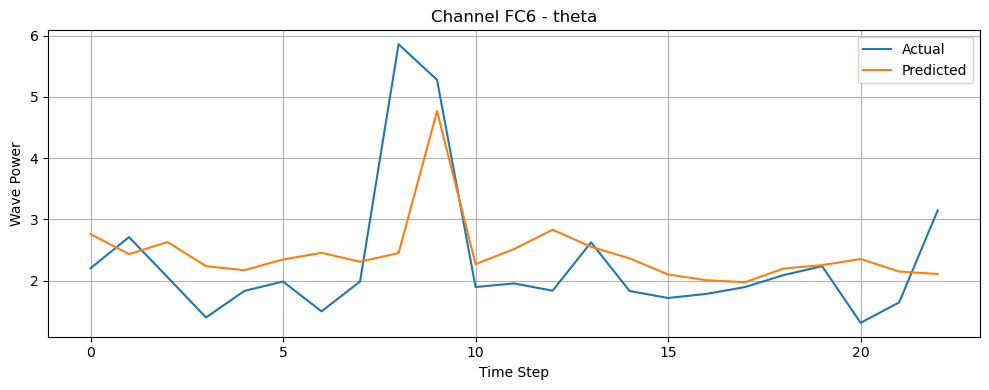

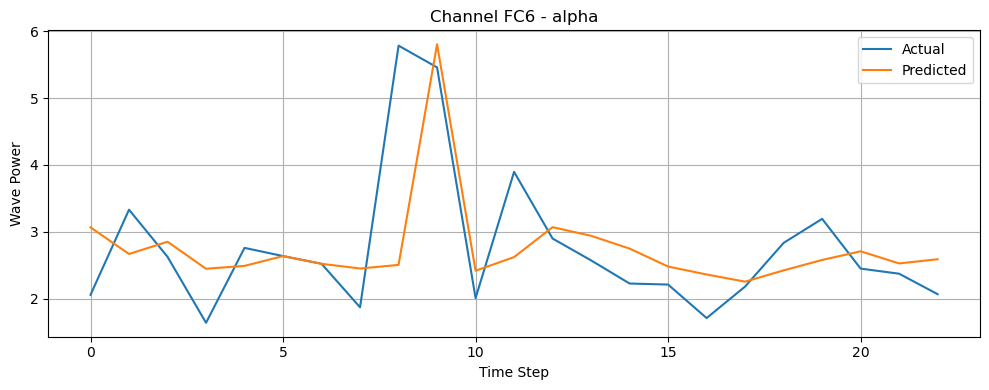

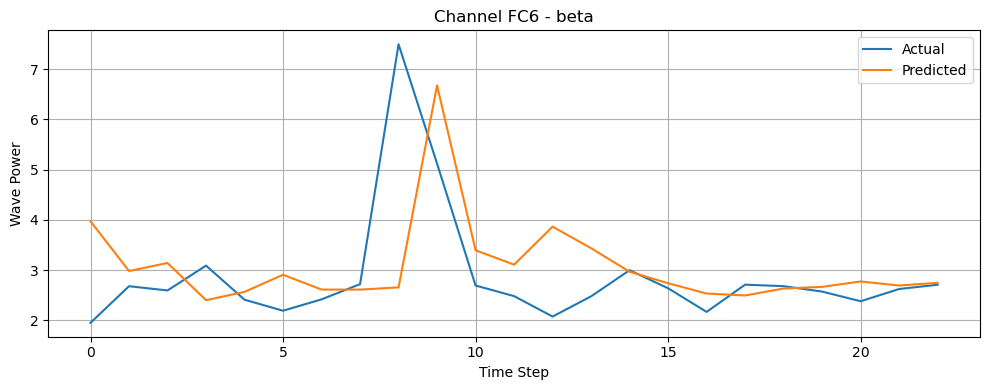

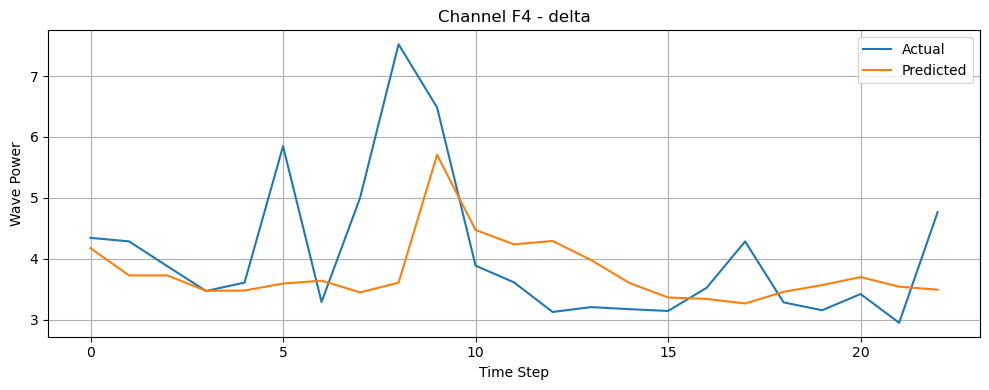

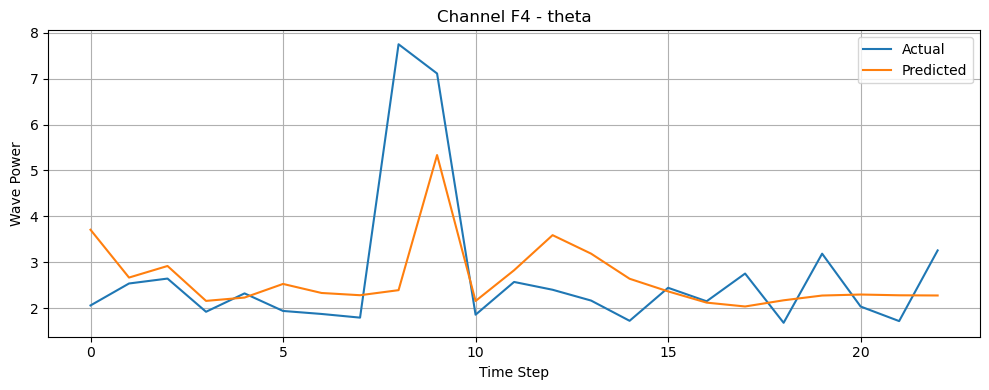

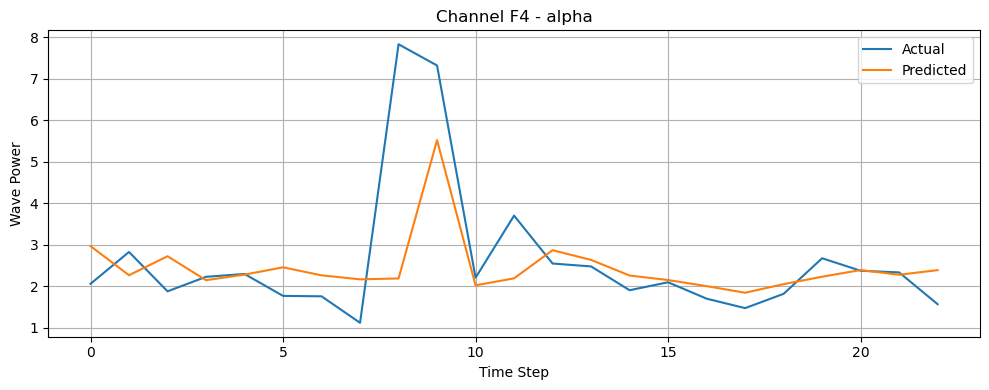

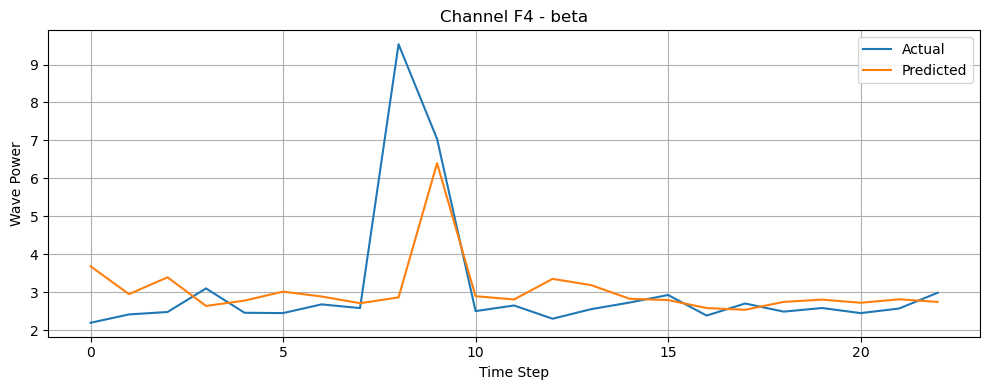

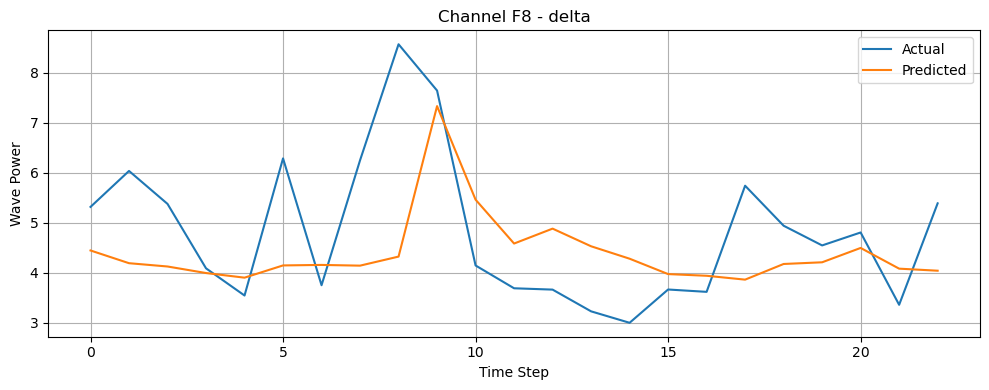

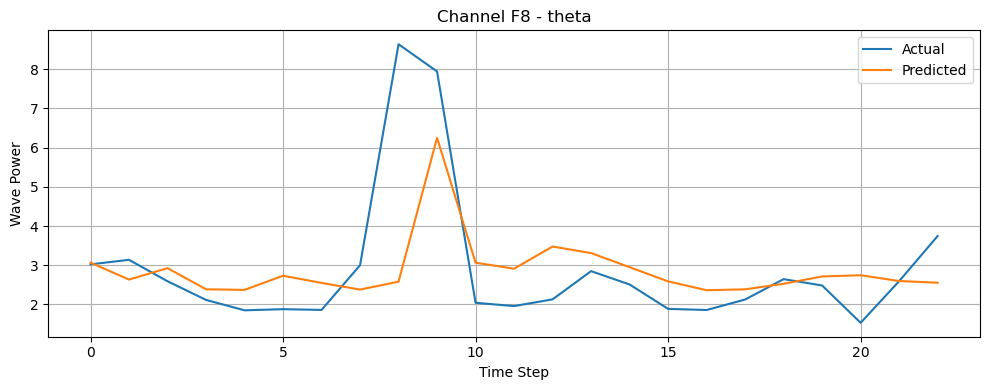

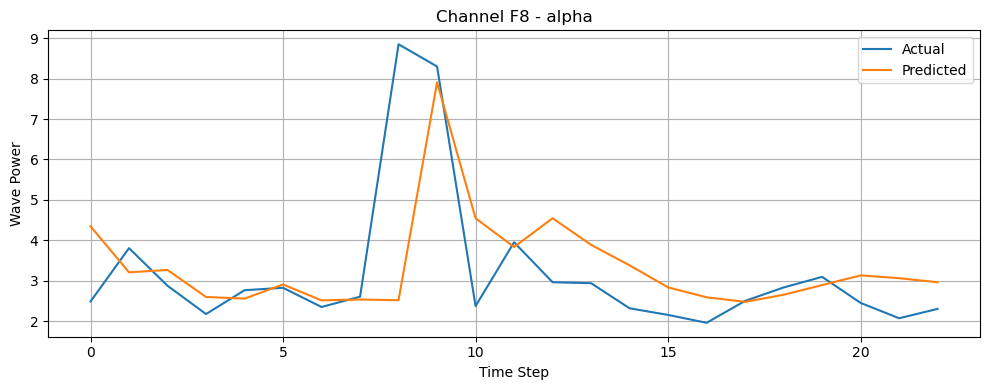

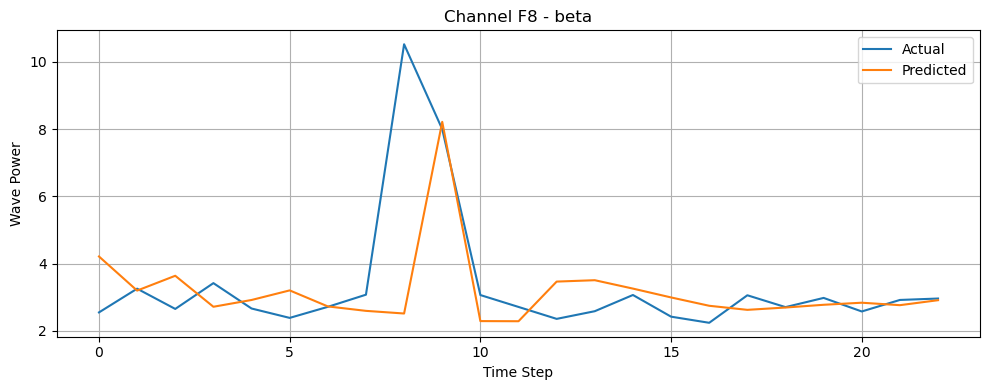

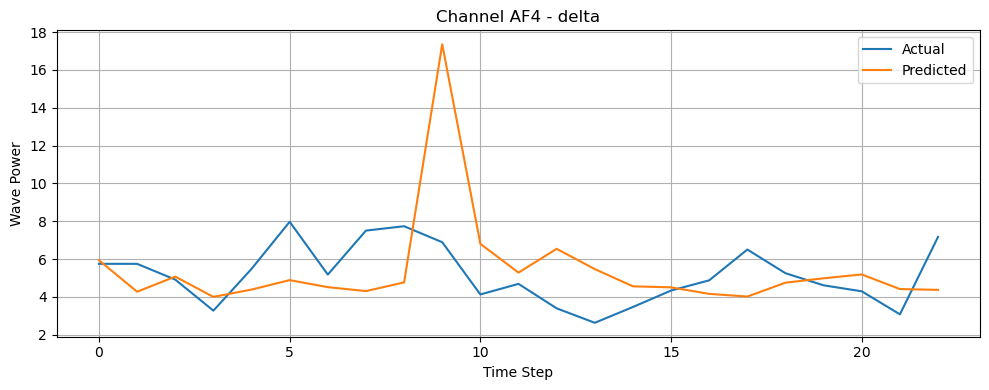

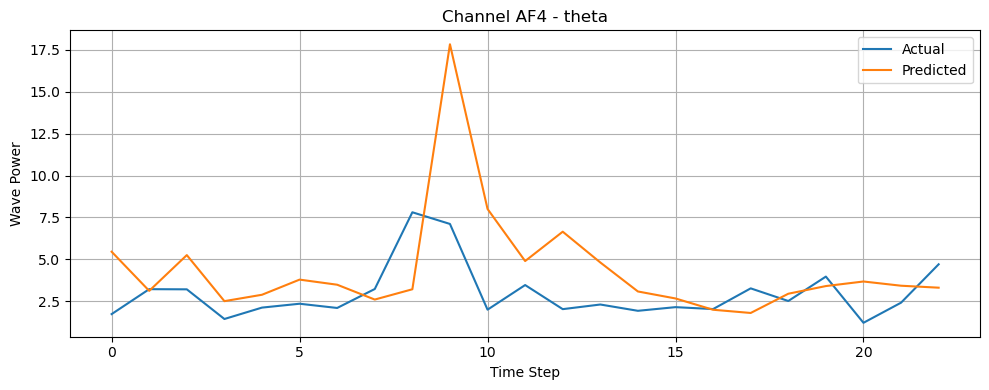

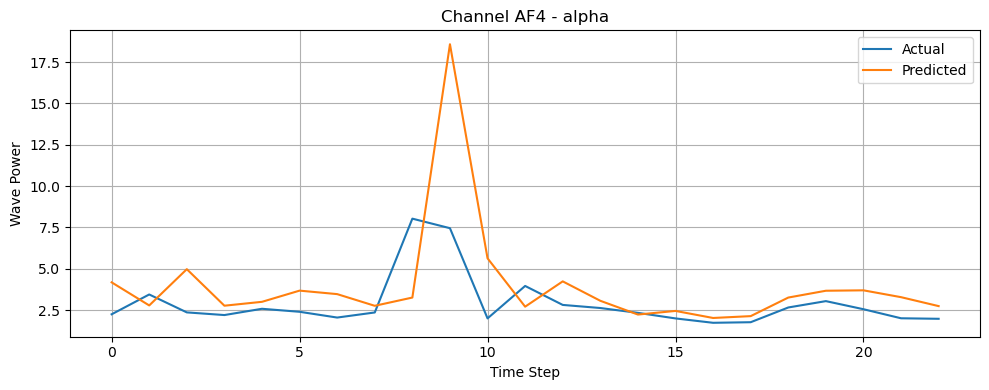

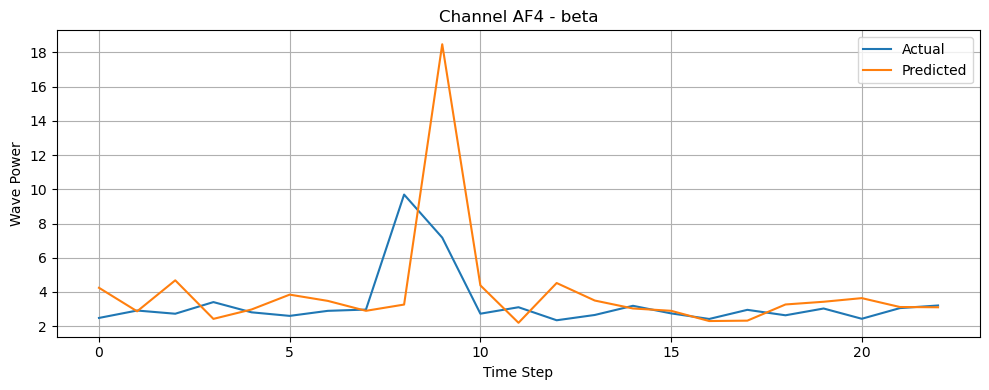

In [92]:
from keras.models import load_model
model = load_model('best_predictor.keras')

# 6. Predict
y_pred = model.predict(X_test)

# 7. Inverse scale predictions and ground truth
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

# 8. Compute RMSE per feature (channel-band pair)
rmse = np.sqrt(np.mean((y_pred_inv - y_test_inv) ** 2, axis=0))
columns = df.columns[:-1]
bands = ['delta', 'theta', 'alpha', 'beta']
print("\nRMSE per channel-band feature (total 56):")
for i, val in enumerate(rmse):
    print(f"Feature {columns[i//4]}-{bands[i%4]}: RMSE = {val:.4f}")

# 9. Visualize some predictions vs actual for selected features
import matplotlib.pyplot as plt

def plot_wave_diff(y_true, y_pred, feature_idx, title):
    plt.figure(figsize=(10, 4))
    plt.plot(y_true[:, feature_idx], label='Actual')
    plt.plot(y_pred[:, feature_idx], label='Predicted')
    plt.title(title)
    plt.xlabel("Time Step")
    plt.ylabel("Wave Power")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot for few features
channel_names = [f'Ch{c}' for c in range(1, 15)]

for ch in range(0, 14):  # EEG channels
    for b_idx, band in enumerate(bands):
        idx = ch * 4 + b_idx
        title = f"Channel {columns[ch]} - {band}"
        plot_wave_diff(y_test_inv, y_pred_inv, idx, title)

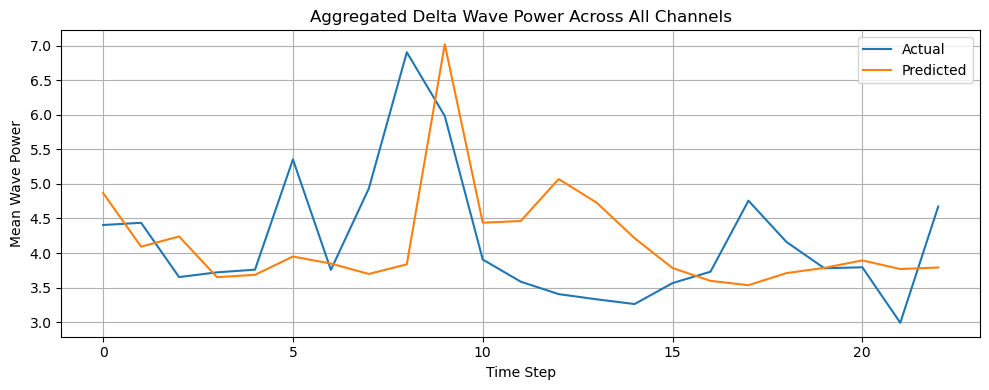

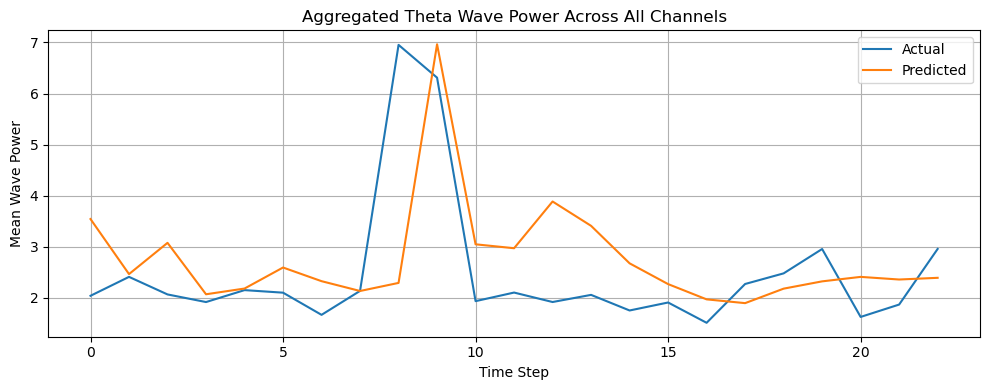

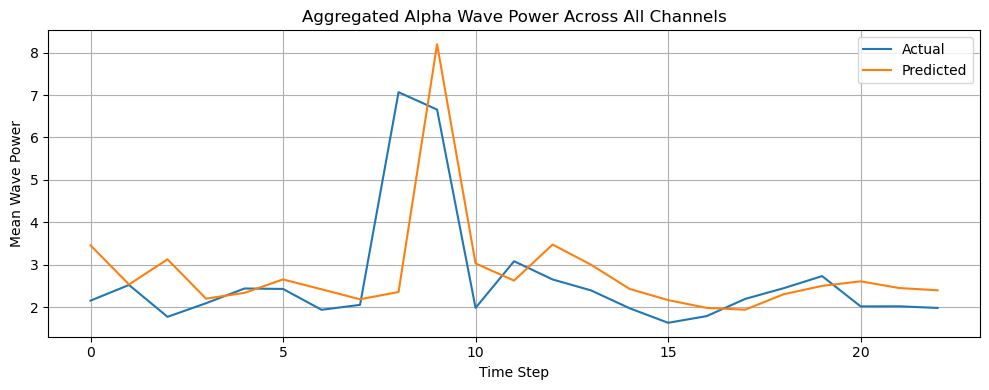

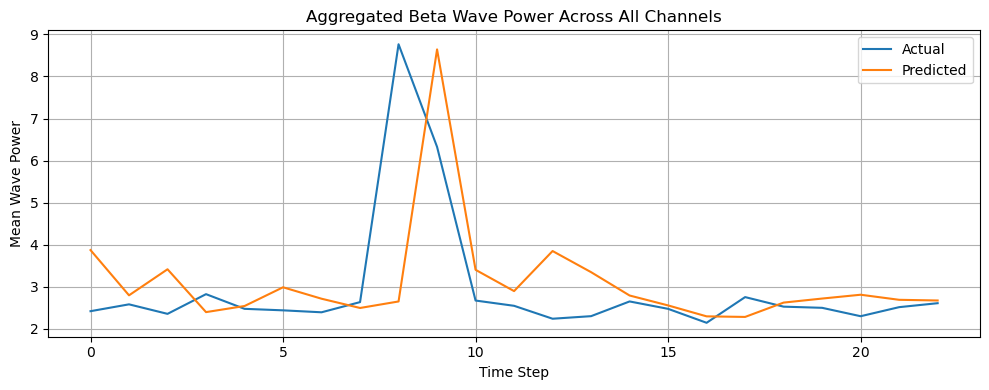


Aggregated Evaluation Metrics for each brain wave:

Delta Wave Metrics:
  MSE : 1.0701
  RMSE: 1.0345
  MAPE: 17.67%

Theta Wave Metrics:
  MSE : 1.6006
  RMSE: 1.2652
  MAPE: 34.22%

Alpha Wave Metrics:
  MSE : 1.3959
  RMSE: 1.1815
  MAPE: 24.55%

Beta Wave Metrics:
  MSE : 2.2419
  RMSE: 1.4973
  MAPE: 22.32%


In [93]:
# 10. Aggregate band powers across all channels
import numpy as np

# Initialize arrays to store average band powers

agg_pred = {band: [] for band in bands}
agg_true = {band: [] for band in bands}

for b_idx, band in enumerate(bands):
    # Extract every 4th feature corresponding to this band from each channel
    band_indices = [ch * 4 + b_idx for ch in range(14)]
    
    # Mean across all 14 channels for each time step
    agg_pred[band] = np.mean(y_pred_inv[:, band_indices], axis=1)
    agg_true[band] = np.mean(y_test_inv[:, band_indices], axis=1)

# 11. Plot aggregated wave comparison
for band in bands:
    plt.figure(figsize=(10, 4))
    plt.plot(agg_true[band], label='Actual')
    plt.plot(agg_pred[band], label='Predicted')
    plt.title(f"Aggregated {band.capitalize()} Wave Power Across All Channels")
    plt.xlabel("Time Step")
    plt.ylabel("Mean Wave Power")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# # 12. Print RMSE for aggregated bands
# print("\nAggregated RMSE for each brain wave:")
# for band in bands:
#     rmse_band = np.sqrt(np.mean((agg_pred[band] - agg_true[band]) ** 2))
#     print(f"{band.capitalize()} Wave RMSE: {rmse_band:.4f}")



# 12. Print evaluation metrics for aggregated bands
print("\nAggregated Evaluation Metrics for each brain wave:")
for band in bands:
    true_vals = agg_true[band]
    pred_vals = agg_pred[band]

    mse = np.mean((pred_vals - true_vals) ** 2)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((true_vals - pred_vals) / (true_vals + 1e-8))) * 100  # small epsilon to avoid division by zero

    print(f"\n{band.capitalize()} Wave Metrics:")
    print(f"  MSE : {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAPE: {mape:.2f}%")


In [94]:
from keras.models import load_model
classifier_model = load_model('./models/best_classifier.keras')


In [95]:
model_input = pd.DataFrame(agg_pred)
model_input

,delta,theta,alpha,beta
0,4.868345,3.542401,3.458674,3.874938
1,4.091848,2.464585,2.536393,2.799823
2,4.239706,3.076403,3.129365,3.418872
3,3.649837,2.069671,2.202082,2.400667
4,3.683943,2.181857,2.339141,2.545519
5,3.948686,2.593497,2.655462,2.990756
6,3.846626,2.326056,2.423192,2.718885
7,3.696726,2.133852,2.187264,2.499075
8,3.836147,2.292042,2.359140,2.653769
9,7.024518,6.964263,8.195765,8.642861


In [96]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


scaled_test_data = scaler.fit_transform(model_input)

SEQ_LEN = 20
X_sequence = []
for i in range(len(scaled_test_data) - SEQ_LEN + 1):
    X_sequence.append(scaled_test_data[i:i + SEQ_LEN])
X_sequence = np.array(X_sequence)

# STEP 6: Predict
predictions = classifier_model.predict(X_sequence)
predicted_classes = (predictions > 0.5).astype(int).flatten()

# STEP 7: Output result
for i, pred in enumerate(predicted_classes):
    state = "Drowsy" if pred == 1 else "Alert"
    print(f"Sequence {i + 1}: {state}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step
Sequence 1: Drowsy
Sequence 2: Drowsy
Sequence 3: Drowsy
Sequence 4: Drowsy
